In [1]:
import numpy as np
from scipy.signal import argrelextrema
import pandas as pd 
import os 
def gen_matrix_F(n, vr):
    # Generate random matrix without diffusion
    
    # Identity matrix representing degradation
    I = np.eye(n)
    
    # Mean
    mu = 0
    
    # Random matrix generator, allowing diagonal term to be non-zero
    B = mu + np.sqrt(vr) * np.random.randn(n, n)
    np.fill_diagonal(B, 0)
    # Modified matrix form
    A = -I + B
   
    # Initialize diffusion matrix
    D = np.zeros((n, n))
    
    return A, D

In [26]:
import math
rm = [] # random matrices 
var = (1.6/math.sqrt(50))**2
for i in range(1000):
    m = gen_matrix_F(50,var)[0]        # size, variance
    rm.append(m)
print(len(rm))

# stable without diffusion
srm = []
for m in rm:
    ev = np.linalg.eigvals(m)
    if np.max(np.real(ev)) < 0:
        srm.append(m)
print((len(srm)/1000)*100, "stable without diffusion")



D = gen_matrix_F(50,var)[1]                # size, variance
D[0, 0] = 1
D[1, 1] = 100
#print(D)
k = np.arange(0, 101, 0.2) 

# filter stable and hopf
urm = []
t1a = []
t1ar = []
t1ai = []
#
t1b = []
t1br = []
t1bi = []
#
t2a = []
t2ar = []
t2ai = []
#
t2b = []
t2br = []
t2bi = []
#
tu = []
tur = []
tui = []
# 
th = []
thr = []
thi = []
#
turing_matrices = []

for m in srm:
    Em = []
    Emi = []
    for i in range(len(k)):
        R = m - D * (k[i] ** 2)
        eigval = np.linalg.eigvals(R)
        Em.append(np.max(np.real(eigval)))
        idx_max = np.argmax(np.real(eigval))
        Emi.append(np.imag(eigval[idx_max]))
    a = np.max(Em)
    index = np.argmax(Em)
    nEm = np.array(Em)
    if a > 0:
        urm.append(m)
        if Emi[index] == 0:
            numZeroCrossing = np.count_nonzero(np.diff(np.sign(Em)))  # Count zero crossings
            numpositivelocalmaxima = np.sum(nEm[argrelextrema(nEm,np.greater)]>0) > 0   #((nEm[np.where(argrelextrema(nEm, np.greater))[0]] > 0)) > 0
            if numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 0:
                t1a.append(m)
                turing_matrices.append(m)
                t1ar.append(Em)
                t1ai.append(Emi)
            elif numpositivelocalmaxima > 0 and numZeroCrossing == 1:
                t1b.append(m)
                turing_matrices.append(m)
                t1br.append(Em)
                t1bi.append(Emi)
            elif numpositivelocalmaxima == 0 and numZeroCrossing % 2 == 1:
                t2a.append(m)
                t2ar.append(Em)
                t2ai.append(Emi)
            elif numpositivelocalmaxima > 0 and numZeroCrossing % 2 == 1:
                t2b.append(m)
                t2br.append(Em)
                t2bi.append(Emi)
            else:
                tu.append(m)
                tur.append(Em)
                tui.append(Emi)
        else:
            th.append(m)
            thr.append(Em)
            thi.append(Emi)
print(((len(urm)-len(th)-len(tu))/len(srm))*100, "unstable due to diffusion")
print(((len(t1a)+len(t1b)+len(t2a)+len(t2b))/1000)*100, "Turing unstable")  
print(((len(t1a)+len(t1b))/1000)*100, "Type 1 unstable")       
print(len(t1a), "type 1a instabilities")
print(len(t1b), "type 1b instabilities")
print(len(t2a), "type 2a instabilities")
print(len(t2b), "type 2b instabilities")
print(len(tu), "unidentified instabilities")
print(len(th), "tuirng-hopf instabilities")


1000
0.0 stable without diffusion


ZeroDivisionError: division by zero

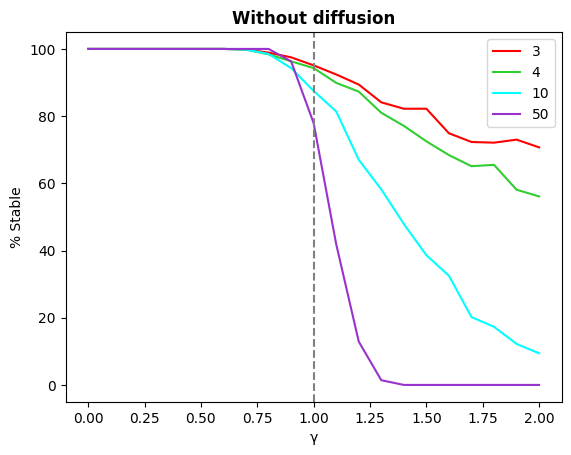

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# stable without diffusion
gamma = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
s3 = [100,100,100,100,100,100,100,99.8,98.9,97.5,95.1,92.4,89.4,84.1,82.2,82.2,74.9,72.3,72.1,73,70.7]
s4 = [100,100,100,100,100,100,100,99.8,98.4,96.3,94.3,89.9,87.3,81,77.1,72.5,68.4,65.1,65.5,58.1,56.1]
s10 = [100,100,100,100,100,100,100,99.8,98.5,94.3,87.5,81.4,67,58.2,47.9,38.6,32.5,20.2,17.3,12.2,9.4]
s50 = [100,100,100,100,100,100,100,100,100,96.3,77.9,41.9,12.9,1.4,0,0,0,0,0,0,0] #[100,100,100,100,100,100,100,100,99.4,96.5,80.4,41.6,13.8,1.7,0,0,0,0,0,0,0]
df1 = pd.DataFrame({'X': gamma, '3': s3, '4': s4, '10': s10, '50': s50})

g = sns.lineplot(data=df1, x='X', y='3', label='3', color = 'red')
sns.lineplot(data=df1, x='X', y='4', label='4', color = 'limegreen')
sns.lineplot(data=df1, x='X', y='10', label='10', color = 'cyan')
sns.lineplot(data=df1, x='X', y='50', label='50', color = 'darkorchid')
g.set(xlabel='\u03B3', ylabel='% Stable')
g.set_title('Without diffusion', fontweight='bold')


plt.axvline(x=1, color='gray', linestyle='--')
plt.legend()
plt.show()

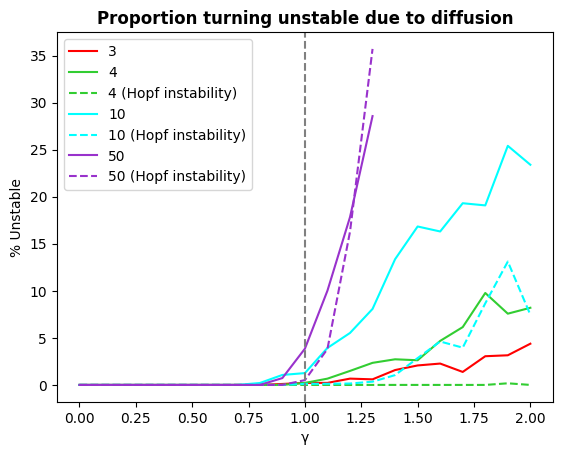

In [28]:
u3 = [0,0,0,0,0,0,0,0,0,0.103,0.21,0.216,0.67,0.594,1.58,2.07,2.27,1.38,3.05,3.15,4.38]
u4 = [0,0,0,0,0,0,0,0,0,0,0.212,0.667,1.489,2.346,2.724,2.621,4.678,6.144,9.771,7.573,8.2]
u4h = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.172,0]
u10 = [0,0,0,0,0,0,0,0,0.203,1.06,1.257,3.931,5.522,8.076,13.361,16.839,16.308,19.31,19.08,25.41,23.4]
u10h = [0,0,0,0,0,0,0,0,0,0,0.114,0.123,0.149,0.344,1.044,2.85,4.615,3.96,8.67,13.11,7.45]
u50 = [0,0,0,0,0,0,0,0,0,0.727,3.85,10.02,17.83,28.57] #[0,0,0,0,0,0,0,0,0,0.62,2.86,10.82,14.49,17.65]
u50h = [0,0,0,0,0,0,0,0,0,0,0.51,3.82,16.28,35.71] #[0,0,0,0,0,0,0,0,0,0,0.62,4.087,19.57,35.29]
x1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3]
#df2 = pd.DataFrame({'X': gamma, '3': u3, '4': u4, '4h': u4h, '10': u10, '10h': u10h, '50': u50, '50h': u50h})

g = sns.lineplot(x=gamma, y=u3, label='3', color = 'red')
sns.lineplot(x=gamma, y=u4, label='4', color = 'limegreen')
sns.lineplot(x=gamma, y=u4h, label='4 (Hopf instability)', color = 'limegreen', linestyle = '--')
sns.lineplot(x=gamma, y=u10, label='10', color = 'cyan')
sns.lineplot(x=gamma, y=u10h, label = '10 (Hopf instability)', color = 'cyan', linestyle = '--')
sns.lineplot(x=x1, y=u50, label = '50', color = 'darkorchid')
sns.lineplot(x=x1, y=u50h, label = '50 (Hopf instability)', color = 'darkorchid', linestyle = '--')

g.set(xlabel='\u03B3', ylabel='% Unstable')
g.set_title('Proportion turning unstable due to diffusion', fontweight='bold')


plt.axvline(x=1, color='gray', linestyle='--')
plt.legend()
plt.show()

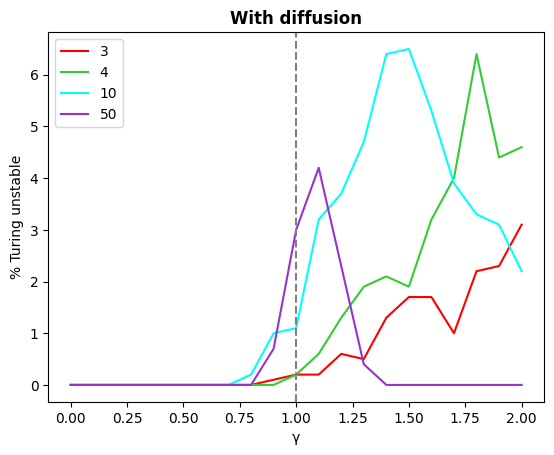

In [29]:
t3 = [0,0,0,0,0,0,0,0,0,0.1,0.2,0.2,0.6,0.5,1.3,1.7,1.7,1,2.2,2.3,3.1]
t4 = [0,0,0,0,0,0,0,0,0,0,0.2,0.6,1.3,1.9,2.1,1.9,3.2,4,6.4,4.399,4.6]
t10 = [0,0,0,0,0,0,0,0,0.2,1,1.099,3.2,3.7,4.7,6.4,6.5,5.3,3.9,3.3,3.1,2.2]
t50 = [0,0,0,0,0,0,0,0,0,0.7,3,4.2,2.3,0.4,0,0,0,0,0,0,0] #[0,0,0,0,0,0,0,0,0,0.6,2.3,4.5,2,0.3,0,0,0,0,0,0,0]
x1 = []
#df2 = pd.DataFrame({'X': gamma, '3': u3, '4': u4, '4h': u4h, '10': u10, '10h': u10h, '50': u50, '50h': u50h})

g = sns.lineplot(x=gamma, y=t3, label='3', color = 'red')
sns.lineplot(x=gamma, y=t4, label='4', color = 'limegreen')
sns.lineplot(x=gamma, y=t10, label='10', color = 'cyan')
sns.lineplot(x=gamma, y=t50, label = '50', color = 'darkorchid')

g.set(xlabel='\u03B3', ylabel='% Turing unstable')
g.set_title('With diffusion', fontweight='bold')


plt.axvline(x=1, color='gray', linestyle='--')
plt.legend()
plt.show()

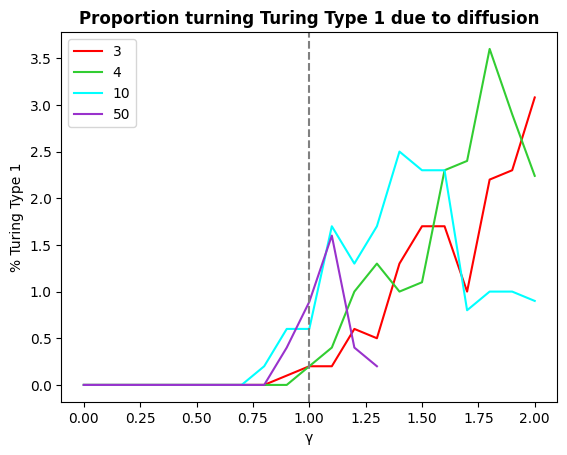

In [30]:
t13 = [0,0,0,0,0,0,0,0,0,0.1,0.2,0.2,0.6,0.5,1.3,1.7,1.7,1,2.2,2.3,3.08] #[0,0,0,0,0,0,0,0,0,0.103,0.21,0.216,0.67,0.594,1.58,2.07,2.27,1.38,3.05,3.15,4.36]
t14 = [0,0,0,0,0,0,0,0,0,0,0.2,0.4,1,1.3,1,1.1,2.3,2.4,3.6,2.9,2.24]#[0,0,0,0,0,0,0,0,0,0,0.212,0.445,1.145,1.605,1.297,1.517,3.363,3.687,5.496,4.991,3.922]
t110 = [0,0,0,0,0,0,0,0,0.2,0.6,0.6,1.7,1.3,1.7,2.5,2.3,2.3,0.8,1,1,0.9] #[0,0,0,0,0,0,0,0,0.203,0.636,0.686,2.088,1.94,2.92,5.22,5.96,7.08,3.96,5.78,8.2,9.57]
t150 = [0,0,0,0,0,0,0,0,0,0.4,0.89,1.6,0.4,0.2] #[0,0,0,0,0,0,0,0,0,0.31,0.87,2.64,3.62,5.88]
x1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3]
#df2 = pd.DataFrame({'X': gamma, '3': u3, '4': u4, '4h': u4h, '10': u10, '10h': u10h, '50': u50, '50h': u50h})

g = sns.lineplot(x=gamma, y=t13, label='3', color = 'red')
sns.lineplot(x=gamma, y=t14, label='4', color = 'limegreen')
sns.lineplot(x=gamma, y=t110, label='10', color = 'cyan')
sns.lineplot(x=x1, y=t150, label = '50', color = 'darkorchid')

g.set(xlabel='\u03B3', ylabel='% Turing Type 1')
g.set_title('Proportion turning Turing Type 1 due to diffusion', fontweight='bold')


plt.axvline(x=1, color='gray', linestyle='--')
plt.legend()
plt.show()